<a href="https://colab.research.google.com/github/sophiasang13/dtechbuild2025ds/blob/main/Gdelt_getter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GDelt


In [ ]:
!pip install --upgrade google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
project_id = "build-466619"
client = bigquery.Client(project=project_id)

In [ ]:
import pandas as pd

In [ ]:
query = """
SELECT
  DATE(PARSE_DATETIME('%Y%m%d%H%M%S', CAST(Date AS STRING))) AS article_date,
  DocumentIdentifier,
  V2Themes,
  V2Organizations,
  V2Tone
FROM
  `gdelt-bq.gdeltv2.gkg`
WHERE
  (
    LOWER(SPLIT(V2Organizations, ';')[OFFSET(0)]) LIKE '%meta platforms%'
  )
  AND (
    LOWER(V2Themes) LIKE '%business%' OR
    LOWER(V2Themes) LIKE '%technology%' OR
    LOWER(V2Themes) LIKE '%social%'
  )
  AND Date >= 20240101000000
ORDER BY
  article_date DESC
"""


In [ ]:
df = client.query(query).to_dataframe()
df['article_date'] = pd.to_datetime(df['article_date'])

# Optionally preview
df.head(20)


,article_date,DocumentIdentifier,V2Themes,V2Organizations,V2Tone
0,2025-07-24,https://www.webpronews.com/whatsapp-beta-tests...,"MEDIA_SOCIAL,1057;UNGP_FORESTS_RIVERS_OCEANS,3...","Meta Platforms Inc,67;Twitter,1057","-1.38648180242634,2.77296360485269,4.159445407..."
1,2025-07-20,https://www.courant.com/2025/07/20/trump-suit-...,WB_2745_JOB_QUALITY_AND_LABOR_MARKET_PERFORMAN...,"Meta Platforms Inc,2514;White House,1434;White...","-2.50347705146036,1.39082058414465,3.894297635..."
2,2025-07-18,https://www.livemint.com/market/stock-market-n...,"CRISISLEX_CRISISLEXREC,210;CRISISLEX_CRISISLEX...","Meta Platforms Inc,2439;Google,3622;Nvidia,6;N...","0.360576923076923,3.00480769230769,2.644230769..."
3,2025-07-17,https://www.marketscreener.com/news/facebook-p...,"TRIAL,98;TRIAL,1452;EPU_CATS_REGULATION,1282;S...","Meta Platforms Inc,377;Us Federal Trade Commis...","-1.55763239875389,1.86915887850467,3.426791277..."
4,2025-07-17,https://www.theepochtimes.com/us/meta-board-zu...,"TAX_FNCACT_CEO,3;CYBER_ATTACK,235;TAX_FNCACT_E...","Meta Platforms Inc,79;Delaware Court,368;Faceb...","-8.45070422535211,1.40845070422535,9.859154929..."
5,2025-07-17,https://www.wandtv.com/news/national/trial-ope...,"MEDIA_SOCIAL,376;MEDIA_SOCIAL,556;MEDIA_SOCIAL...","Meta Platforms Inc,2500;Supreme Court,2680;Fac...","-2.5974025974026,2.16450216450216,4.7619047619..."
6,2025-07-17,https://www.cbsnews.com/news/facebook-trial-me...,"SOC_POINTSOFINTEREST_SCHOOL,1522;TAX_POLITICAL...","Meta Platforms Inc,2471;Facebook,347;Facebook,...","-2.62008733624454,2.18340611353712,4.803493449..."
7,2025-07-17,https://www.mankatofreepress.com/news/business...,"WB_678_DIGITAL_GOVERNMENT,1085;WB_694_BROADCAS...","Meta Platforms Inc,2500;Facebook,376;Facebook,...","-2.5974025974026,2.16450216450216,4.7619047619..."
8,2025-07-17,https://www.journalgazette.net/ap/business/tri...,"TAX_FNCACT_FOUNDER,2031;MEDIA_SOCIAL,364;MEDIA...","Meta Platforms Inc,2488;Facebook,364;Facebook,...","-2.99539170506912,1.84331797235023,4.838709677..."
9,2025-07-17,https://www.webpronews.com/meta-poaches-openai...,"SCIENCE,188;SCIENCE,1286;EPU_CATS_NATIONAL_SEC...","Meta Platforms Inc,83;Superintelligence Lab,43...","1.57790927021696,6.70611439842209,5.1282051282..."


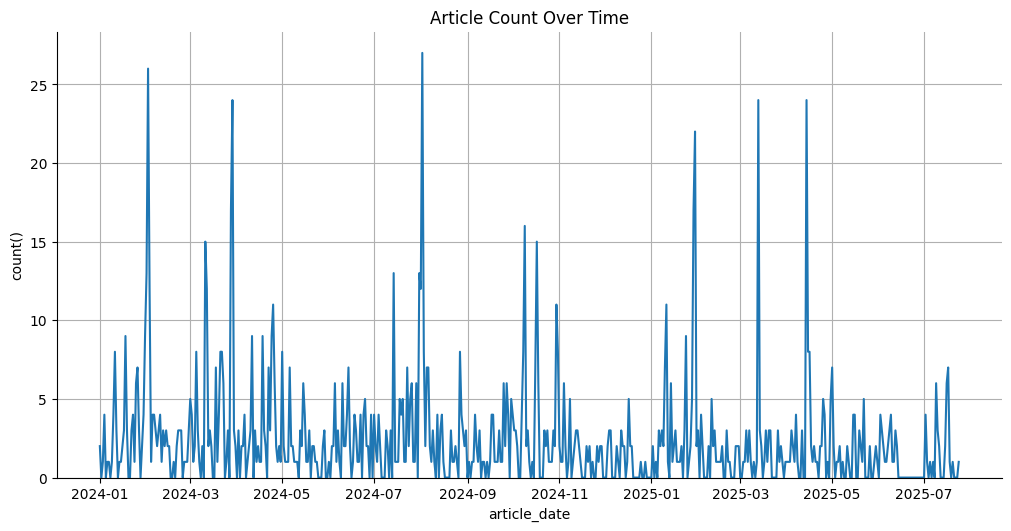

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported in this cell

# Assuming df is already loaded and processed with article_date

# Calculate the count of articles per date
counted = (df['article_date']
              .value_counts()
            .reset_index(name='counts')
            .rename({'index': 'article_date'}, axis=1)
            .sort_values('article_date', ascending=True))

# Create a complete date range from the minimum to maximum date in your data
date_range = pd.date_range(start=df['article_date'].min(), end=df['article_date'].max(), freq='D')
full_date_df = pd.DataFrame(date_range, columns=['article_date'])

# Merge the counted data with the full date range and fill missing counts with 0
counted_full = pd.merge(full_date_df, counted, on='article_date', how='left').fillna(0)


# Create the plot
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Plot the single series for article count over time
sns.lineplot(data=counted_full, x='article_date', y='counts', ax=ax)

sns.despine(fig=fig, ax=ax)
plt.xlabel('article_date')
_ = plt.ylabel('count()')
plt.title('Article Count Over Time') # Add a title for clarity
plt.grid(True) # Add a grid for better readability
ax.set_ylim(bottom=0) # Set the y-axis to start at 0
plt.show() # Explicitly show the plot

In [ ]:
# prompt: count number of data points i have

print(f"Number of data points: {len(df)}")

In [ ]:
# prompt: count how many days are missing data opints out of total days

# Assuming `counted_full` DataFrame is already created from the previous steps

# Calculate total number of days in the range
total_days = len(counted_full)

# Calculate number of days with missing data points (count is 0)
missing_days = counted_full[counted_full['counts'] == 0]['article_date'].count()

print(f"Total number of days in the period: {total_days}")
print(f"Number of days with missing data points: {missing_days}")

# Meta Getter

In [ ]:
import pandas as pd

df = pd.read_csv('Meta Dataset.csv')


df['Date'] = pd.to_datetime(df['Date'])


df = df.sort_values('Date')

df.reset_index(drop=True, inplace=True)

print(df.isnull().sum())
df.dropna(inplace=True)

df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Final preview
print(df.head(366))

df.to_csv('Cleaned_Meta_Dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download("Cleaned_Meta_Dataset.csv")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Meta_Dataset.csv to Cleaned_Meta_Dataset.csv


In [ ]:
df = pd.read_csv('Cleaned_Meta_Dataset.csv')
print(df.columns)
selected_df = df[['date', 'open', 'close']]
print(selected_df.head())
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] >= '2023-01-01') & (df['date'] <= '2025-12-31')
filtered_df = df[mask]
result = df.loc[mask, ['date', 'open', 'close']]
result.to_csv('Filtered_Meta_Dataset_2023_2025.csv', index=False)
from google.colab import files
files.download('Filtered_Meta_Dataset_2023_2025.csv')



Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')
         date       open      close
0  2012-05-18  42.049999  38.230000
1  2012-05-21  36.529999  34.029999
2  2012-05-22  32.610001  31.000000
3  2012-05-23  31.370001  32.000000
4  2012-05-24  32.950001  33.029999


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Meta

In [ ]:
import pandas as pd

# Read the filtered Meta dataset
filtered_df = pd.read_csv('Filtered_Meta_Dataset_2023_2025.csv')

# Display the first few rows to verify
print(filtered_df.head())

# Display info about the DataFrame to check data types and non-null values
print(filtered_df.info())

         date        open       close
0  2023-01-03  122.820000  124.739998
1  2023-01-04  127.379997  127.370003
2  2023-01-05  126.129997  126.940002
3  2023-01-06  128.970001  130.020004
4  2023-01-09  131.160004  129.470001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    355 non-null    object 
 1   open    355 non-null    float64
 2   close   355 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.4+ KB
None


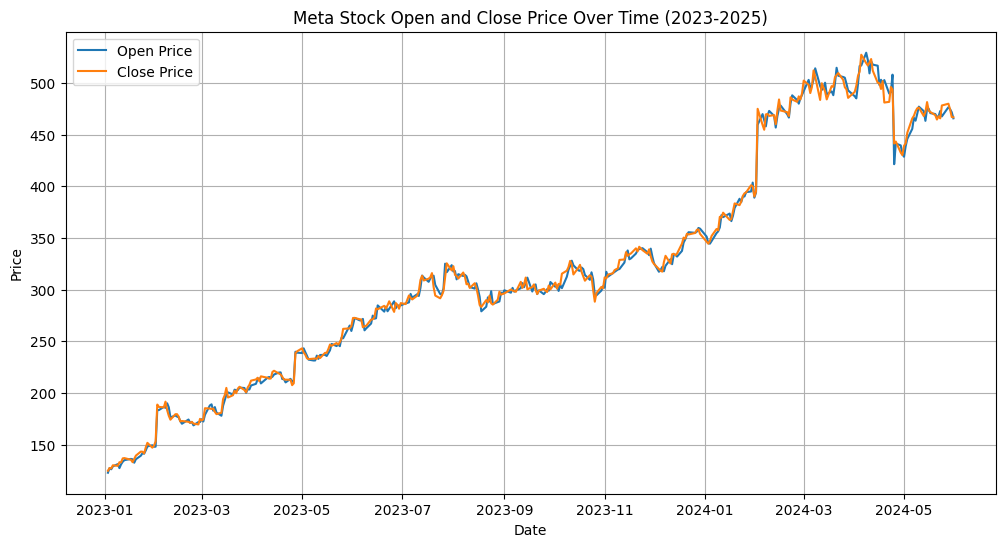

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Plotting the opening and closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='open', label='Open Price')
sns.lineplot(data=filtered_df, x='date', y='close', label='Close Price')
plt.title('Meta Stock Open and Close Price Over Time (2023-2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
last_date = filtered_df['date'].max()
print(f"The last date in the dataset is: {last_date}")

The last date in the dataset is: 2024-05-31 00:00:00


In [ ]:
last_date = filtered_df['date'].max()
print(f"The last date in the dataset is: {last_date}")

In [ ]:
# Rename for clarity
stock_df = filtered_df[['date', 'close']].copy()
stock_df.rename(columns={'date': 'article_date'}, inplace=True)

# Merge stock data with GDELT article counts
merged = pd.merge(stock_df, counted_full, on='article_date', how='left')

# Fill missing article counts with 0
merged['counts'] = merged['counts'].fillna(0)


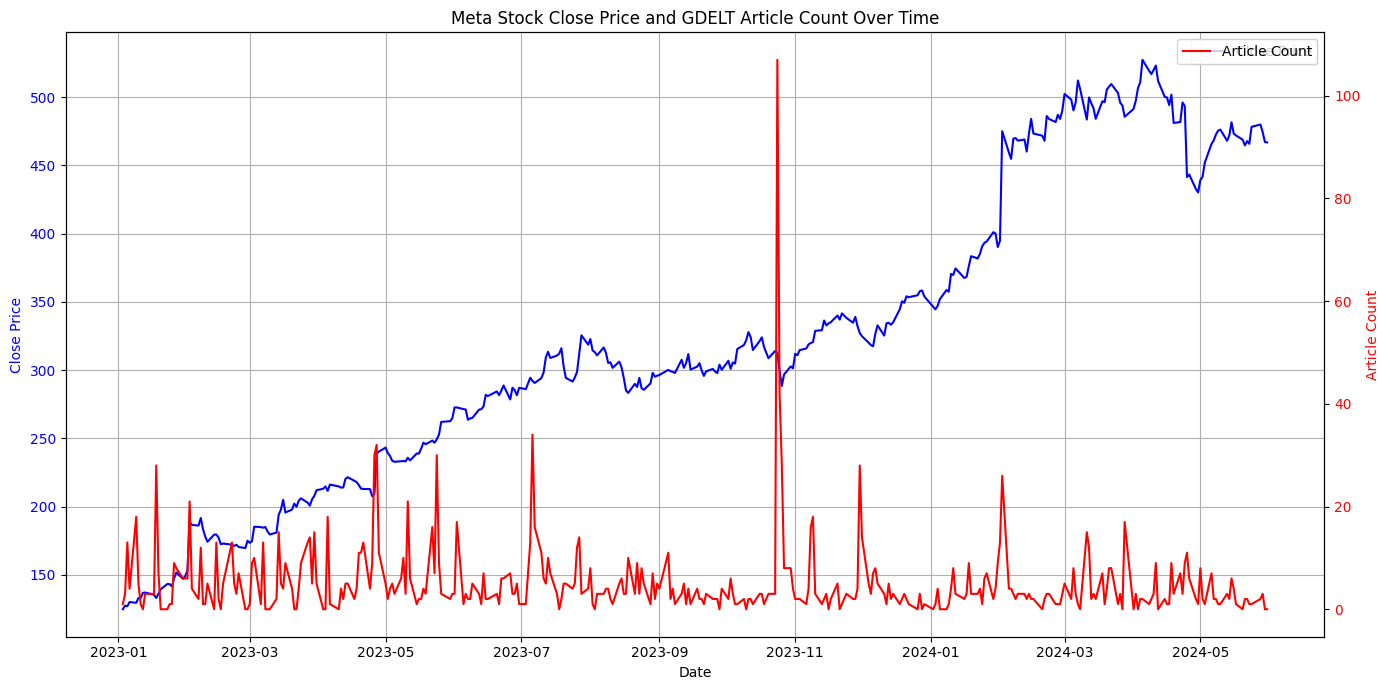

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure article_date is datetime
merged['article_date'] = pd.to_datetime(merged['article_date'])

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing price on the primary axis
sns.lineplot(data=merged, x='article_date', y='close', ax=ax1, color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for the article counts
ax2 = ax1.twinx()
sns.lineplot(data=merged, x='article_date', y='counts', ax=ax2, color='red', label='Article Count')
ax2.set_ylabel('Article Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Meta Stock Close Price and GDELT Article Count Over Time')
ax1.grid(True)

# Improve layout and show plot
fig.tight_layout()
plt.show()

In [ ]:
# Assuming filtered_df is already loaded and contains 'date' and 'close' columns
# Ensure filtered_df is sorted by date to correctly calculate the delta
filtered_df = filtered_df.sort_values('date')
filtered_df['price_delta'] = filtered_df['close'].diff()

# Display the DataFrame with the new 'price_delta' column
display(filtered_df.head())

,date,open,close,price_delta
0,2023-01-03,122.820000,124.739998,NaN
1,2023-01-04,127.379997,127.370003,2.630005
2,2023-01-05,126.129997,126.940002,-0.430001
3,2023-01-06,128.970001,130.020004,3.080002
4,2023-01-09,131.160004,129.470001,-0.550003


In [ ]:
import pandas as pd

# Load the GDELT dataset
# Assuming the GDELT data is available in a DataFrame named 'df'
# If not, you would need to load it from the appropriate source (e.g., CSV)
# gdelt_df = pd.read_csv('Filtered_GDELT_Dataset_2023_2025.csv')
# For now, I will use the 'df' variable which seems to contain GDELT data based on the notebook state
gdelt_df = df.copy()


# Display the first few rows to verify
print(gdelt_df.head())

# Display info about the DataFrame to check data types and non-null values
print(gdelt_df.info())

# Define a function to parse V2Tone
def parse_v2tone(tone_string):
    if isinstance(tone_string, str) and tone_string:
        try:
            # The first value is typically the tone score
            return float(tone_string.split(',')[0])
        except (ValueError, IndexError):
            return None
    return None

# Apply the parsing function
gdelt_df['tone_score'] = gdelt_df['V2Tone'].apply(parse_v2tone)

# Group by date and calculate the mean tone score
daily_sentiment_df = gdelt_df.groupby('article_date')['tone_score'].mean().reset_index()

# Display the resulting DataFrame
print(daily_sentiment_df.head())
print(daily_sentiment_df.info())

  article_date                                 DocumentIdentifier  \
0   2024-05-29  https://www.theglobeandmail.com/canada/article...   
1   2024-05-29  https://article.wn.com/view/2024/05/28/Meta_AI...   
2   2024-05-29  https://www.bnnbloomberg.ca/meta-billionaire-c...   
3   2024-05-28  https://www.luxtimes.lu/europeanunion/too-smal...   
4   2024-05-28  https://news.bloomberglaw.com/esg/meta-ruling-...   

                                            V2Themes  \
0  TAX_FNCACT_TEACHER,2849;TAX_FNCACT_TEACHER,298...   
1  TAX_FNCACT_CHIEF,133;TAX_FNCACT_OUTLAW,493;TRI...   
2  TAX_FNCACT_ORGANIZER,1381;TAX_FNCACT_ORGANIZER...   
3  USPEC_POLICY1,6591;WB_2433_CONFLICT_AND_VIOLEN...   
4  MEDIA_SOCIAL,1583;WB_635_PUBLIC_HEALTH,525;WB_...   

                                     V2Organizations  \
0  Meta Platforms Inc,1518;District School Board ...   
1  Meta Platforms Inc,512;Facebook,200;Facebook,3...   
2  Meta Platforms Inc,1640;Yale University,7765;G...   
3  Meta Platforms Inc,31

In [ ]:
# Merge the stock delta DataFrame with the daily sentiment DataFrame
# Assuming filtered_df now has 'price_delta' and daily_sentiment_df has 'tone_score'
merged_analysis_df = pd.merge(
    filtered_df[['date', 'price_delta']],
    daily_sentiment_df,
    left_on='date',
    right_on='article_date',
    how='inner' # Use inner join to keep only dates present in both dataframes
)

# Drop the redundant date column from the sentiment DataFrame
merged_analysis_df.drop('article_date', axis=1, inplace=True)

# Display the merged DataFrame
print(merged_analysis_df.head())
print(merged_analysis_df.info())

        date  price_delta  tone_score
0 2023-01-03          NaN   -5.937500
1 2023-01-04     2.630005   -2.961005
2 2023-01-05    -0.430001   -4.226449
3 2023-01-06     3.080002   -1.141304
4 2023-01-09    -0.550003   -3.274317
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         320 non-null    datetime64[ns]
 1   price_delta  319 non-null    float64       
 2   tone_score   320 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.6 KB
None


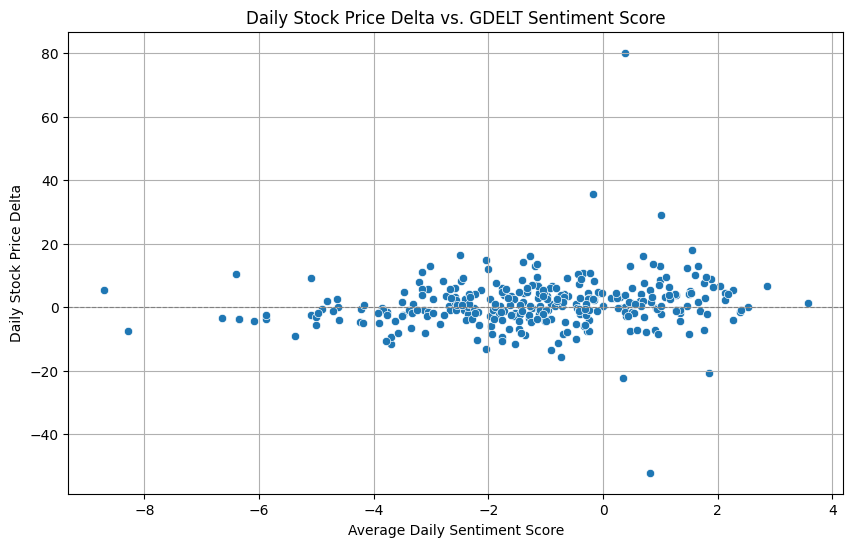

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of price delta vs. tone score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_analysis_df, x='tone_score', y='price_delta')

plt.title('Daily Stock Price Delta vs. GDELT Sentiment Score')
plt.xlabel('Average Daily Sentiment Score')
plt.ylabel('Daily Stock Price Delta')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a horizontal line at y=0
plt.show()

In [ ]:
# Merge the filtered_df (with price_delta) and counted_full (with counts)
merged_delta_count_df = pd.merge(
    filtered_df[['date', 'price_delta']],
    counted_full,
    left_on='date',
    right_on='article_date',
    how='inner' # Use inner join to keep only dates present in both dataframes
)

# Drop the redundant date column from the counted_full DataFrame after merging
merged_delta_count_df.drop('article_date', axis=1, inplace=True)

# Display the merged DataFrame to verify
print(merged_delta_count_df.head())
print(merged_delta_count_df.info())

        date  price_delta  counts
0 2023-01-03          NaN     1.0
1 2023-01-04     2.630005     3.0
2 2023-01-05    -0.430001    13.0
3 2023-01-06     3.080002     4.0
4 2023-01-09    -0.550003    18.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         353 non-null    datetime64[ns]
 1   price_delta  352 non-null    float64       
 2   counts       353 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.4 KB
None


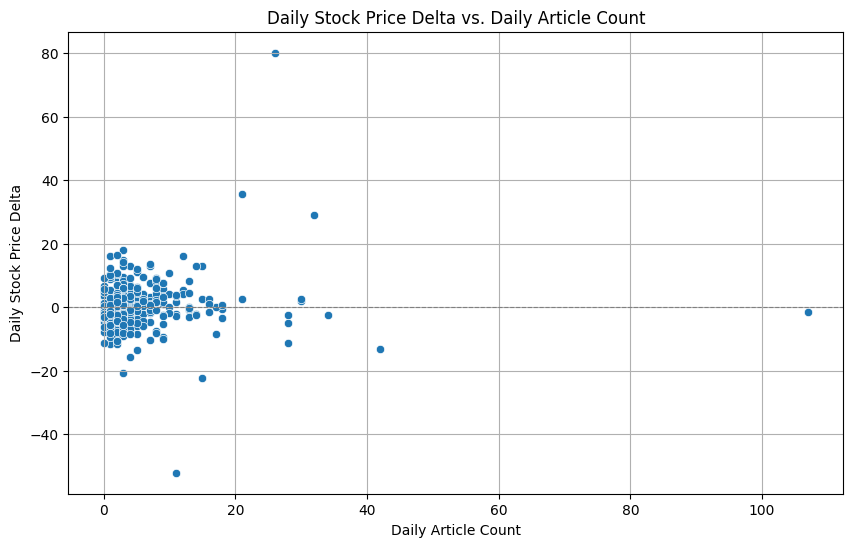

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of price delta vs. article count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_delta_count_df, x='counts', y='price_delta')

plt.title('Daily Stock Price Delta vs. Daily Article Count')
plt.xlabel('Daily Article Count')
plt.ylabel('Daily Stock Price Delta')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a horizontal line at y=0
plt.show()